In [1]:
# Library requirement
# ! pip3 install mlxtend --upgrade
# ! pip3 install scikit-learn --upgrade
# ! pip3 install xgboost --upgrade

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## 1. Data

### 1.1 Load data

In [3]:
data = pd.read_csv('input_bcell.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14387 entries, 0 to 14386
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14387 non-null  object 
 1   protein_seq          14387 non-null  object 
 2   start_position       14387 non-null  int64  
 3   end_position         14387 non-null  int64  
 4   peptide_seq          14387 non-null  object 
 5   chou_fasman          14387 non-null  float64
 6   emini                14387 non-null  float64
 7   kolaskar_tongaonkar  14387 non-null  float64
 8   parker               14387 non-null  float64
 9   isoelectric_point    14387 non-null  float64
 10  aromaticity          14387 non-null  float64
 11  hydrophobicity       14387 non-null  float64
 12  stability            14387 non-null  float64
 13  target               14387 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.5+ MB


### 1.2 Construct and add processed features

In [4]:
data['peptide_len'] = data['peptide_seq'].apply(lambda x:len(x))
data['protein_len'] = data['protein_seq'].apply(lambda x:len(x))
data['start_position'] = data['start_position']/data['protein_len']

## 2. Exploratory Data Analysis

### 2.1 Numeric features

<AxesSubplot:>

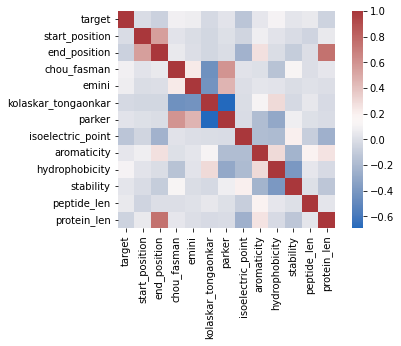

In [5]:
numeric_cols = ['start_position', 'end_position',
       'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'peptide_len', 'protein_len']
sns.heatmap(data[['target']+numeric_cols].corr(), square=True, cmap="vlag")

<AxesSubplot:xlabel='target', ylabel='peptide_len'>

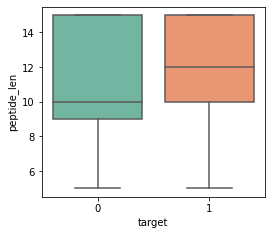

In [6]:
plt.figure(figsize=(4,3.5))
sns.boxplot(x='target', y='peptide_len', data=data, palette="Set2")

<AxesSubplot:xlabel='target', ylabel='protein_len'>

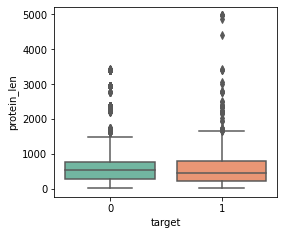

In [7]:
plt.figure(figsize=(4,3.5))
sns.boxplot(x='target', y='protein_len', data=data, palette="Set2")

<AxesSubplot:xlabel='aromaticity', ylabel='Density'>

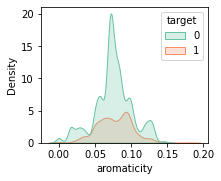

In [8]:
plt.figure(figsize=(3,2.5))
sns.kdeplot(x='aromaticity', data=data, hue='target', palette="Set2", fill=True)

<AxesSubplot:xlabel='isoelectric_point', ylabel='Density'>

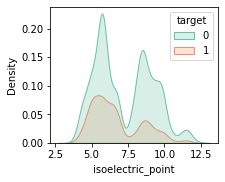

In [9]:
plt.figure(figsize=(3,2.5))
sns.kdeplot(x='isoelectric_point', data=data, hue='target', palette="Set2", fill=True)

<AxesSubplot:xlabel='hydrophobicity', ylabel='Density'>

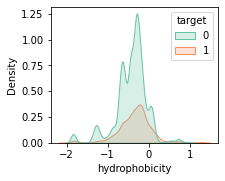

In [10]:
plt.figure(figsize=(3,2.5))
sns.kdeplot(x='hydrophobicity', data=data, hue='target', palette="Set2", fill=True)

Text(0.5, 0, 'log(emini+1)')

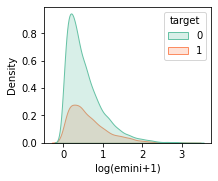

In [11]:
plt.figure(figsize=(3,2.5))
sns.kdeplot(np.log(data['emini']+1), hue=data['target'], palette="Set2", fill=True)
plt.xlabel("log(emini+1)")

<AxesSubplot:xlabel='kolaskar_tongaonkar', ylabel='Density'>

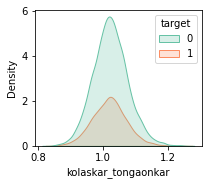

In [12]:
plt.figure(figsize=(3,2.5))
sns.kdeplot(x='kolaskar_tongaonkar', data=data, hue='target', palette="Set2", fill=True)

<AxesSubplot:xlabel='chou_fasman', ylabel='Density'>

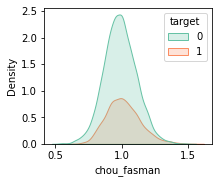

In [13]:
plt.figure(figsize=(3,2.5))
sns.kdeplot(x='chou_fasman', data=data, hue='target', palette="Set2", fill=True)

<AxesSubplot:xlabel='stability', ylabel='Density'>

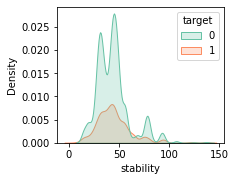

In [14]:
plt.figure(figsize=(3,2.5))
sns.kdeplot(x='stability', data=data, hue='target', palette="Set2", fill=True)

<AxesSubplot:xlabel='parker', ylabel='Density'>

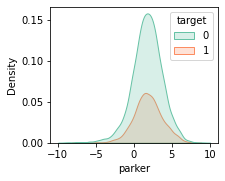

In [15]:
plt.figure(figsize=(3,2.5))
sns.kdeplot(x='parker', data=data, hue='target', palette="Set2", fill=True)

### 2.2 Sequential features


Subsequence with length of 1

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

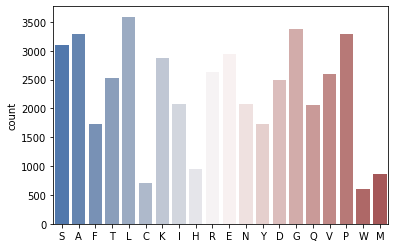

In [16]:
active_seq = ''.join(data[data['target'] == 1]['peptide_seq'])
sns.countplot(list(active_seq), palette="vlag")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

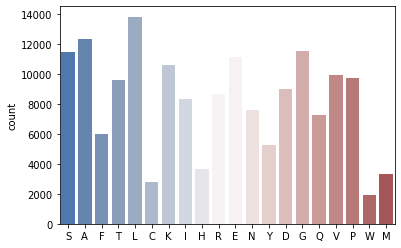

In [17]:
all_seq = ''.join(data['peptide_seq'])
sns.countplot(list(all_seq), palette="vlag")

Subsequence with length of 4

In [18]:
# Help function for extracting subsequences
def parse(seq, length):
    return [seq[i:i+length] for i in range(len(seq) - length + 1)]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

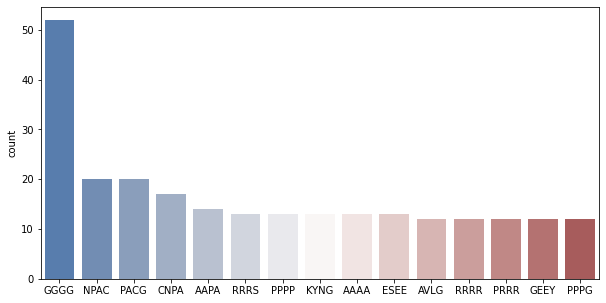

In [19]:
active_seq_4 = data[data['target'] == 1]['peptide_seq'].apply(lambda x:parse(x, length=4)).sum()
plt.figure(figsize=(10,5))
sns.countplot(active_seq_4, order=pd.value_counts(active_seq_4).iloc[:15].index, palette="vlag")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

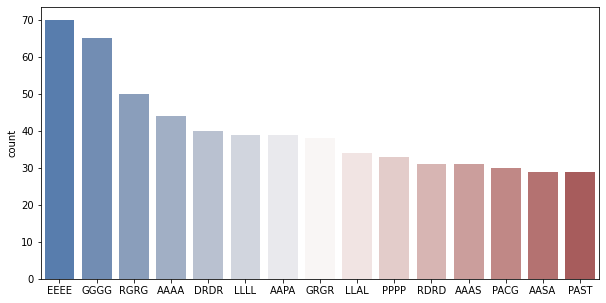

In [20]:
active_seq_4 = data['peptide_seq'].apply(lambda x:parse(x, length=4)).sum()
plt.figure(figsize=(10,5))
sns.countplot(active_seq_4, order=pd.value_counts(active_seq_4).iloc[:15].index, palette="vlag")

## 3. Stage 1: Sequential feature selection

In [21]:
# Help function for extracting subsequences frequency
def freq_item(data, length = 5, support = 0.003):
    raw = data['peptide_seq'].apply(lambda x:parse(x, length))
    te = TransactionEncoder()
    te_ary = te.fit(raw).transform(raw)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    df['target'] = data['target']
    return df

Subsequences with length of 4:

In [22]:
# Extract subsequences with length of 4
df4 = freq_item(data, length = 4)

# ...and filter out the ones that occurs at least 15 times
colnames = df4.columns
new_4 = pd.DataFrame()
for i,each in enumerate(colnames):
    count = np.sum(df4[each])
    if count >= 15:
        new_4 = pd.concat([new_4,df4[each]],axis = 1)

new_4.shape

(14387, 243)

In [23]:
# Select subsequences based on association rules
result_4 = apriori(new_4, min_support=0.0005, max_len=2, use_colnames = True)
rules_4 = association_rules(result_4, min_threshold=.6)
feats_4 = rules_4[rules_4['consequents'] == {'target'}]['antecedents']
feats_4

10    (AVLG)
14    (CNPA)
27    (ESEE)
30    (GGGG)
44    (KYNG)
52    (NPAC)
57    (PACG)
58    (PGPS)
61    (PRRR)
62    (RKRR)
Name: antecedents, dtype: object

Subsequences with length of 5:

In [24]:
# Extract subsequences with length of 5
df5 = freq_item(data)

# ...and filter out the ones that occurs at least 10 times
colnames = df5.columns
new_5 = pd.DataFrame()
for i,each in enumerate(colnames):
    count = np.sum(df5[each])
    if count >= 10:
        new_5 = pd.concat([new_5, df5[each]], axis = 1)

In [25]:
# Select subsequences based on association rules
result_5 = apriori(new_5, min_support=0.0005, max_len=2, use_colnames = True)
rules_5 = association_rules(result_5, min_threshold=.6)
feats_5 = rules_5[rules_5['consequents'] == {'target'}]['antecedents']
feats_5

130    (CNPAC)
172    (EAAYS)
185    (EEKPA)
286    (GEEYL)
299    (GGGGG)
440    (KGVDA)
543    (NGEEY)
553    (NPACG)
578    (PACGR)
579    (PAVLG)
696    (SGGGG)
727    (YSKYG)
Name: antecedents, dtype: object

Subsequences with length of 6:

In [26]:
# Extract subsequences with length of 6
df6 = freq_item(data, length = 6)

# ...and filter out the ones that occurs at least 7 times
colnames = df6.columns
new_6 = pd.DataFrame()
for i,each in enumerate(colnames):
    count = np.sum(df6[each])
    if count >= 7:
        new_6 = pd.concat([new_6,df6[each]],axis = 1)

del df6
new_6.shape

(14387, 634)

In [27]:
# Select subsequences based on association rules
result_6 = apriori(new_6, min_support=0.0005, max_len=2, use_colnames = True)
rules_6 = association_rules(result_6, min_threshold=.6)
feats_6 = rules_6[rules_6['consequents'] == {'target'}]['antecedents']
feats_6

58     (AVLGHD)
71     (CNPACG)
120    (EEKPAV)
121    (EEYLIL)
132    (EKPAVL)
155    (EYLILS)
194    (GEEYLI)
201    (GGGGGA)
202    (GGGGGG)
203    (GHDEAA)
282    (KPAVLG)
311    (LGHDEA)
314    (LILSAR)
357    (NGEEYL)
362    (NPACGR)
377    (PAVLGH)
462    (VLGHDE)
463    (YLILSA)
Name: antecedents, dtype: object

### 3.1 Collinearity reduction

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [29]:
X2 = pd.DataFrame()
for feat in feats_4:
    X2[list(feat)[0]] = new_4[feat]
for feat in feats_5:
    X2[list(feat)[0]] = new_5[feat]
for feat in feats_6:
    X2[list(feat)[0]] = new_6[feat]

X2 = X2.astype('int32')    
X2.shape

(14387, 40)

<AxesSubplot:>

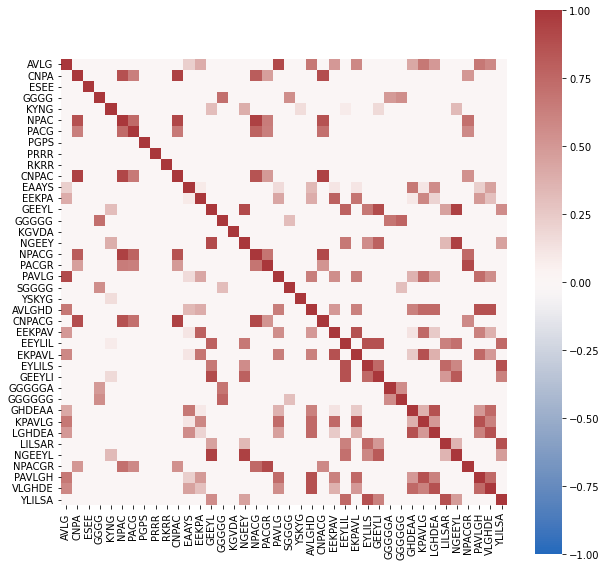

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(X2.corr(), square=True, cmap='vlag', vmin=-1)

In [31]:
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['index'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif


In [32]:
vif = calculate_vif(X2)
while (vif['VIF'] > 10).any():
    max_vif = vif.sort_values(by='VIF',ascending=False)['VIF'].iloc[0]
    feat = vif[vif['VIF'] == max_vif]['index'].values[-1]
    print(feat)
    X2.drop(feat, axis=1, inplace=True)
    vif = calculate_vif(X2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


CNPACG
NGEEYL
NPAC
CNPAC
GEEYL


### 3.2 Model-based feature selection

In [33]:
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from xgboost import plot_importance

from sklearn.model_selection import train_test_split

In [34]:
target = data['target']
X_train, X_test, y_train, y_test = train_test_split(X2, target, test_size=0.2, random_state=10)

In [35]:
dtrain = xgboost.DMatrix(data = X_train, label = y_train)
param = {'max_depth':12, 'objective': "binary:logistic",'eta':0.03,'nrounds':300}
xgb_f = xgboost.train(param, dtrain)

[03:34:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [36]:
pred = xgb_f.predict(dtrain)
metrics.roc_auc_score(y_train, pred)

0.5176817547792105

In [37]:
impo_dict = xgb_f.get_score(importance_type = "gain")
seq_feats = sorted(impo_dict.keys(), key = lambda x:impo_dict[x], reverse=True)[:15]
seq_feats

['NPACG',
 'GGGG',
 'AVLGHD',
 'KYNG',
 'GHDEAA',
 'ESEE',
 'EEKPAV',
 'YSKYG',
 'EAAYS',
 'KPAVLG',
 'EYLILS',
 'LILSAR',
 'RKRR',
 'KGVDA',
 'PGPS']

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

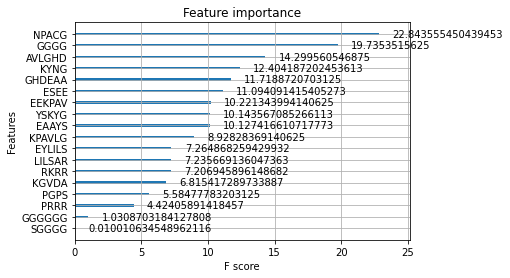

In [38]:
plot_importance(xgb_f, importance_type = "gain")

## Stage 2: Modelling with sequential features - xgboosting

In [39]:
base_feats = ['start_position', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
        'peptide_len', 'protein_len']
X1 = data[base_feats].copy()

X = pd.concat([X1,X2[seq_feats]],axis=1)
X.shape

(14387, 26)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=10)

In [41]:
X1_train = X_train[base_feats]
X1_test = X_test[base_feats]
dtrain1 = xgboost.DMatrix(data = X1_train, label = y_train)
dtest1 = xgboost.DMatrix(data = X1_test, label = y_test)
param = {'max_depth':12, 'objective': "binary:logistic",'eta':0.03,'nrounds':200}
xgb1 = xgboost.train(param, dtrain1)

[03:34:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [42]:
def auc(y, pred, title = ''):
    roc_auc = metrics.roc_auc_score(y, pred)
    print(roc_auc)
    display = metrics.RocCurveDisplay.from_predictions(y, pred, name = 'XGBoost')
    plt.title(title)
    plt.show()

0.9467444009291776


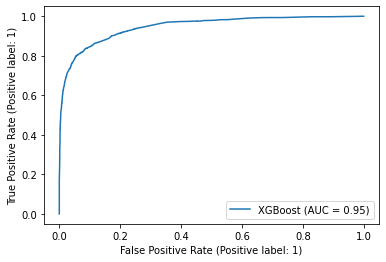

In [43]:
pred = xgb1.predict(dtrain1)
auc(y_train, pred)

In [45]:
pred = xgb1.predict(dtest1)
metrics.roc_auc_score(y_test, pred)

0.8950390359842124

<AxesSubplot:title={'center':'Feature importance without sequential features'}, xlabel='Gain', ylabel='Features'>

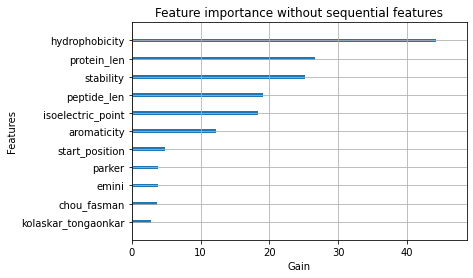

In [46]:
plot_importance(xgb1, importance_type = "gain",  title = 'Feature importance without sequential features',
                xlabel = 'Gain', show_values=False)

In [47]:
dtrain = xgboost.DMatrix(data = X_train, label = y_train)
dtest = xgboost.DMatrix(data = X_test, label = y_test)
watchlist = [(dtest,'eval'), (dtrain,'train')]

param = {'max_depth':18, 'objective': "binary:logistic",'eta':0.03,'nrounds':300, 
        #  'watchlist':watchlist,'early_stopping_rounds':20
         }
xgb = xgboost.train(param, dtrain)

[03:35:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.9694289024659754


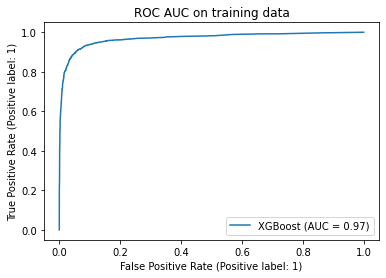

In [48]:
pred = xgb.predict(dtrain)
auc(y_train, pred, title= 'ROC AUC on training data')

0.9081969556930034


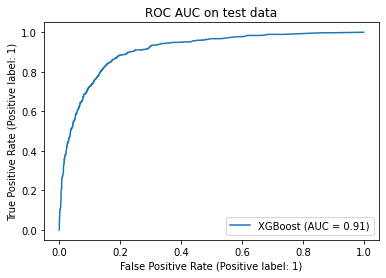

In [49]:
pred = xgb.predict(dtest)
auc(y_test, pred, title= 'ROC AUC on test data')

<AxesSubplot:title={'center':'Feature importance with sequential features'}, xlabel='Gain', ylabel='Features'>

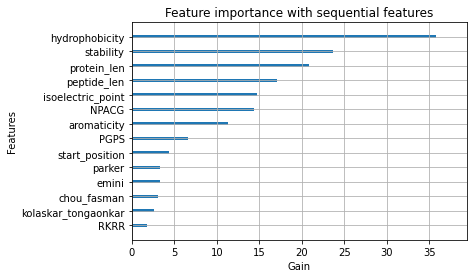

In [50]:
plot_importance(xgb, importance_type = "gain", title = 'Feature importance with sequential features',
                xlabel = 'Gain', show_values=False)